# 🌟 Learn **y = 2x + 1** with a Linear Layer (PyTorch) — *Explained Step‑by‑Step*

**Course:** COMP3057

**Goal:** Instead of hard‑coding \($y = 2x + 1$\), we will **learn** it from data using a **Linear Layer** `nn.Linear(1, 1)`.

## What you'll learn 🎯
- 🧠 What a **Linear Layer** is: \($y = w x + b$\)
- 🧪 How to **generate data** (inputs and targets)
- ⚙️ How to pick a **loss function (MSE)** and an **optimizer (SGD)**
- 🔁 How the **training loop** works: forward → loss → backward → step
- 📈 How to **plot** the learning curve and check predictions

> Intuition: The Linear Layer will *discover* numbers close to **$w = 2$** and **$b = 1$** from examples — just like a student figuring out a rule from homework problems!


## 🗺️ Concept Map: From Data ➜ Model ➜ Learning

- **Data**: Pairs of numbers (x, y) where the true rule is \($y = 2x + 1$\).  
- **Model**: Linear function with learnable parameters: \($\hat{y} = w x + b$\).  
- **Loss (MSE)**: Measures how far \($\hat{y}$\) is from the true \($y$\):  
  \($\text{MSE} = \frac{1}{N} \sum_i (\hat{y}_i - y_i)^2$\).  
- **Optimizer (SGD)**: Uses gradients to tweak \($w$\) and \($b$\) to **reduce** the loss.  
- **Training loop**: Repeat until the loss is small and parameters stabilize.  


## 1) Setup & Imports ✅

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# For reproducibility
torch.manual_seed(42)

print('PyTorch version:', torch.__version__)

PyTorch version: 2.8.0+cu126


## 2) Generate Training & Test Data 🧪

We simulate data from the true rule \(y = 2x + 1\). To make it realistic, we can add a little **noise** (like measurement errors).
- **Training set**: $x = 0..9$ (integers), y from the true line (optionally with noise)
- **Test set**: $x = [0.5, 2.5, 4.5, 6.5, 8.5]$ (unseen), clean y (no noise) for clarity

> Shapes matter! We use tensors of shape **$[N, 1]$** so they fit `nn.Linear(1,1)` which expects 1D inputs per sample.


In [3]:
# True mapping: y = 2x + 1
true_w, true_b = 2.0, 1.0

# Training inputs: 0..9 (column vector [N,1])
x_train = torch.arange(0, 100, dtype=torch.float32).unsqueeze(1)
y_train = true_w * x_train + true_b

# Add small Gaussian noise (toggle this to see the effect)
add_noise = True
noise_std = 0.1
if add_noise:
    y_train = y_train + noise_std * torch.randn_like(y_train)

# Test data: "new" x not seen during training
x_test = torch.tensor([[0.5],[2.5],[4.5],[6.5],[8.5]], dtype=torch.float32)
y_test = true_w * x_test + true_b  # keep clean to evaluate clearly

print('x_train shape:', x_train.shape, '| y_train shape:', y_train.shape)
print('x_test  shape:', x_test.shape,  '| y_test  shape:', y_test.shape)

x_train shape: torch.Size([100, 1]) | y_train shape: torch.Size([100, 1])
x_test  shape: torch.Size([5, 1]) | y_test  shape: torch.Size([5, 1])


### 👀 Quick Look at the Training Data
A quick scatter plot helps you trust the data — you should see roughly a straight line.


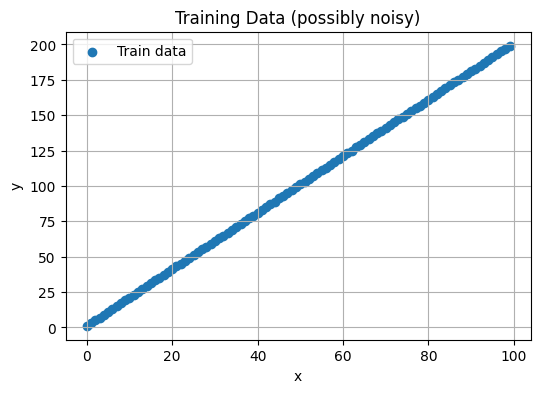

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Train data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data (possibly noisy)')
plt.legend()
plt.grid(True)
plt.show()

## 3) Define the Linear Model 🧱


**Linear Layer:** `class torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)`

Applies an affine linear transformation to the incoming data:
$y = x A^{T} + b$.

* **in_features (int)** – size of each input sample

* **out_features (int)** – size of each output sample

* **bias (bool)** – If set to False, the layer will not learn an additive bias. Default: True

`nn.Linear(1, 1)` means:
- **Input dimension = 1** (each $x$ is a single number)
- **Output dimension = 1** (predict a single $y$)
- Internally, it stores **weight** `w` and **bias** `b` that we will learn.


In [8]:
model = nn.Linear(1, 1)  # y_hat = w * x + b
print(model)

# Peek at initial parameters (they start random-ish)
init_w = model.weight.item()
init_b = model.bias.item()
print(f'Initial w ≈ {init_w:.4f}, b ≈ {init_b:.4f}')

Linear(in_features=1, out_features=1, bias=True)
Initial w ≈ -0.4309, b ≈ -0.5987


## 4) Loss & Optimizer ⚙️

- **Loss (MSE)**:  
  $\text{MSE} = \frac{1}{N} \sum_i (\hat{y}_i - y_i)^2$ — smaller is better.
- **Optimizer (SGD)**: Stochastic Gradient Descent moves \($w$\) and \($b$\) in the direction that reduces MSE.  
  Learning rate **$lr$** controls step size (too small = slow, too big = unstable).


In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)

## 5) Train the Model 🔁

Each epoch does:
1. **Forward**: compute predictions \($\hat{y} = w x + b$\)
2. **Loss**: compute \($\text{MSE}(\hat{y}, y)$\)
3. **Backward**: compute gradients of loss wrt parameters
4. **Step**: update parameters using the optimizer

We also **record loss** so we can plot a learning curve.


In [9]:
num_epochs = 300
loss_history = []

for epoch in range(1, num_epochs + 1):
    # 1) Forward
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # 2) Backward (compute gradients)
    optimizer.zero_grad()
    loss.backward()

    # 3) Parameter update
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 50 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f'Epoch {epoch:3d}/{num_epochs} | loss={loss.item():.6f} | w≈{w:.4f}, b≈{b:.4f}')

print('\nFinal learned params:')
print('  w ≈', model.weight.item())
print('  b ≈', model.bias.item())
print('Ground truth: w = 2.0, b = 1.0')

Epoch  50/300 | loss=19791.185547 | w≈-0.4309, b≈-0.5987
Epoch 100/300 | loss=19791.185547 | w≈-0.4309, b≈-0.5987
Epoch 150/300 | loss=19791.185547 | w≈-0.4309, b≈-0.5987
Epoch 200/300 | loss=19791.185547 | w≈-0.4309, b≈-0.5987
Epoch 250/300 | loss=19791.185547 | w≈-0.4309, b≈-0.5987
Epoch 300/300 | loss=19791.185547 | w≈-0.4309, b≈-0.5987

Final learned params:
  w ≈ -0.4308730363845825
  b ≈ -0.5986685752868652
Ground truth: w = 2.0, b = 1.0


## 6) Learning Curve 📉
A healthy learning run shows loss decreasing and then flattening.


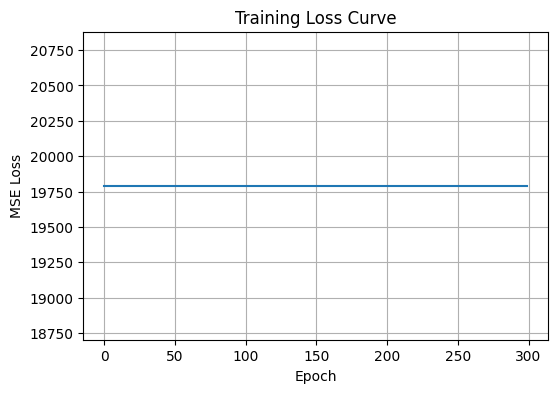

In [10]:
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

## 7) Predictions vs. Ground Truth 🔍

We compare:
- **Learned line** (model predictions over a dense $x$ grid)
- **True line** \($y = 2x + 1$\)
- **Training points** (possibly noisy)


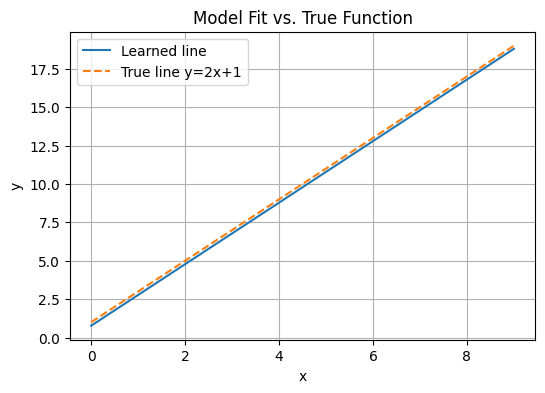

In [ ]:
# Make predictions
with torch.no_grad():
    x_line = torch.linspace(0, 9, steps=200).unsqueeze(1)
    y_line_pred = model(x_line)
    y_line_true = true_w * x_line + true_b

plt.figure(figsize=(6,4))
#plt.scatter(x_train.numpy(), y_train.numpy(), label='Train data')
plt.plot(x_line.numpy(), y_line_pred.numpy(), label='Learned line')
plt.plot(x_line.numpy(), y_line_true.numpy(), linestyle='--', label='True line y=2x+1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Fit vs. True Function')
plt.legend()
plt.grid(True)
plt.show()

## 8) Test on Unseen Points 🧪➡️📏

We check how well the learned model generalizes to new $x$ values not used during training.


In [11]:
with torch.no_grad():
    y_test_pred = model(x_test)
    test_mse = nn.MSELoss()(y_test_pred, y_test).item()

print('Test x:')
print(x_test.squeeze().tolist())
print('True y:', y_test.squeeze().tolist())
print('Pred y:', y_test_pred.squeeze().tolist())
print(f'→ Test MSE: {test_mse:.6f}')

Test x:
[0.5, 2.5, 4.5, 6.5, 8.5]
True y: [2.0, 6.0, 10.0, 14.0, 18.0]
Pred y: [-0.8141050934791565, -1.6758511066436768, -2.537597179412842, -3.399343252182007, -4.261089324951172]
→ Test MSE: 204.464508
